# Exploring Netflix Data



This notebook follows the [CRISP-DM](https://paginas.fe.up.pt/~ec/files_0405/slides/02%20CRISP.pdf) process to analyze the [Netflix Movies and TV Shows on Kaggle.](https://www.kaggle.com/shivamb/netflix-shows)

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting [report](https://flixable.com/netflix-museum/) which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## Business Understanding

These are the guiding questions that drive this analysis
* Which Country produces most content available on netflix?
* In what month of the year, does the most new content arrives on netflix?
* How does the different genres relate to the target audience belonging to different age groups?
* What is the time difference between release date and netflix arrival date of a show/movie? # rephrase it 


### Setup

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [3]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [4]:
df = pd.read_csv('netflix_titles.csv')


df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Getting to know Data

First we will have a look at the total number of rows and column in the data

In [5]:
df.shape

(7787, 12)

The data types for every column can be found as:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Handling Date data

In [7]:
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

First we will convert the string column to datetime and separate out the month and year columns for our analysis.
For this analysis, we will remove any rows with missing values for the *date_added* column.

In [8]:
df.dropna(subset=['date_added'], inplace=True)
df['date_added'] = pd.to_datetime(df['date_added'])
df['added_year']= df['date_added'].dt.year
df['added_month']= df['date_added'].dt.month_name().str.slice(stop=3)

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,added_month
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,Aug
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,Dec
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,Dec
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,Nov
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,Jan


In [9]:
df['date_added'].dt.month_name().str.slice(stop=3)

0       Aug
1       Dec
2       Dec
3       Nov
4       Jan
       ... 
7782    Oct
7783    Mar
7784    Sep
7785    Oct
7786    Mar
Name: date_added, Length: 7777, dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7786
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7777 non-null   object        
 1   type          7777 non-null   object        
 2   title         7777 non-null   object        
 3   director      5398 non-null   object        
 4   cast          7059 non-null   object        
 5   country       7271 non-null   object        
 6   date_added    7777 non-null   datetime64[ns]
 7   release_year  7777 non-null   int64         
 8   rating        7770 non-null   object        
 9   duration      7777 non-null   object        
 10  listed_in     7777 non-null   object        
 11  description   7777 non-null   object        
 12  added_year    7777 non-null   int64         
 13  added_month   7777 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(11)
memory usage: 911.4+ KB


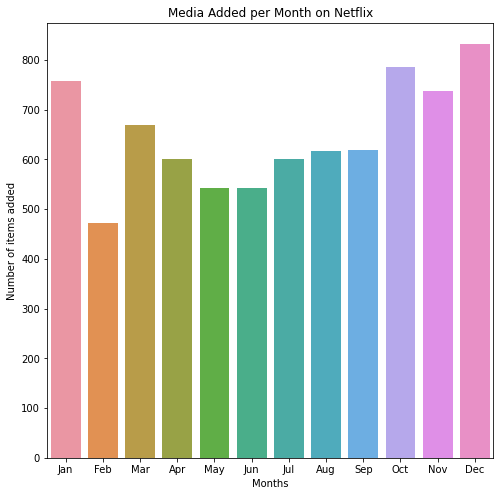

In [11]:
plt.figure(figsize=(8 , 8))
hue_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax = sns.countplot(data=df, x='added_month', order=hue_order)
ax.set(xlabel='Months', ylabel='Number of items added', title='Media Added per Month on Netflix')
plt.show()

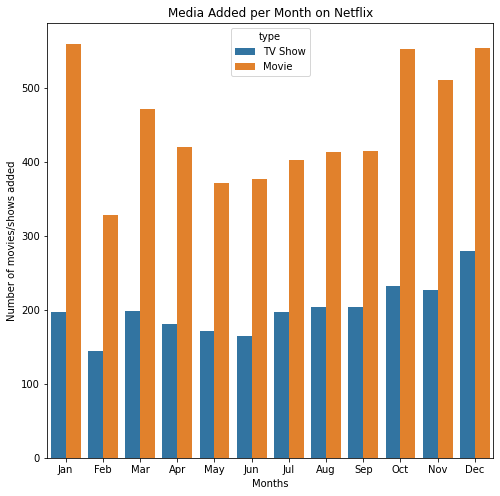

In [12]:
plt.figure(figsize=(8 , 8))
hue_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax = sns.countplot(data=df, x='added_month', order=hue_order, hue='type')
ax.set(xlabel='Months', ylabel='Number of movies/shows added', title='Media Added per Month on Netflix')
plt.show()

From the above graphs, it can be seen that most content gets uploaded to netlflix in December followed by October and then January. This can lead us to conclusion that Netflix adds new data near holiday season.

In [13]:
rel_year = df.release_year.value_counts()

In [14]:
for idx, year in rel_year.iteritems():
    print(idx)

2018
2017
2019
2016
2020
2015
2014
2013
2012
2010
2011
2009
2008
2007
2006
2005
2004
2003
2002
2001
2000
1999
2021
1998
1997
1993
1990
1995
1996
1992
1991
1988
1994
1982
1989
1979
1973
1986
1983
1984
1985
1976
1981
1980
1977
1974
1987
1975
1978
1967
1968
1971
1960
1972
1945
1955
1962
1944
1943
1958
1946
1965
1942
1969
1963
1954
1970
1956
1925
1964
1966
1947
1959


In [15]:
type(rel_year)

pandas.core.series.Series

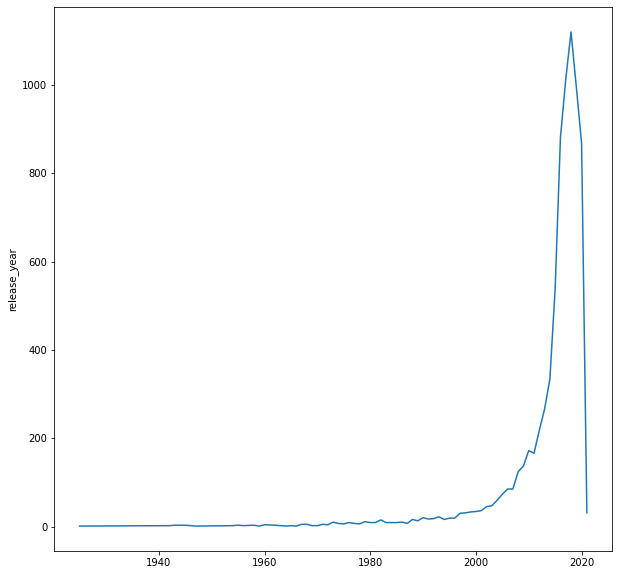

In [162]:
plt.figure(figsize=(10 , 10))
sns.lineplot(data=rel_year)
plt.show()

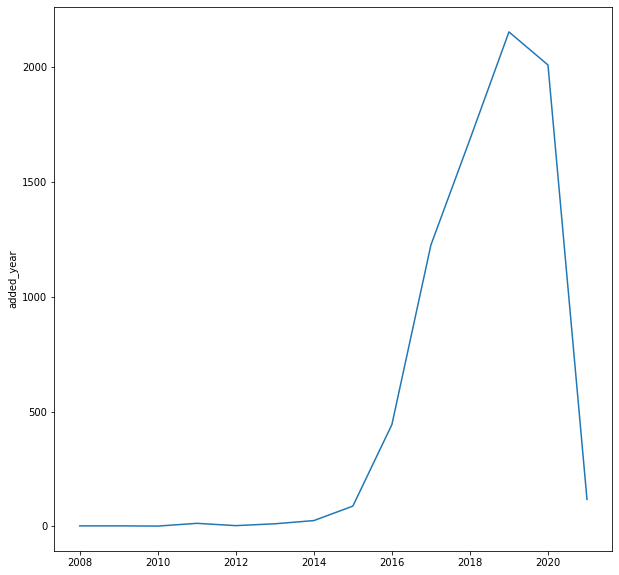

In [16]:
add_year = df.added_year.value_counts()
plt.figure(figsize=(10 , 10))
sns.lineplot(data=add_year)
plt.show()

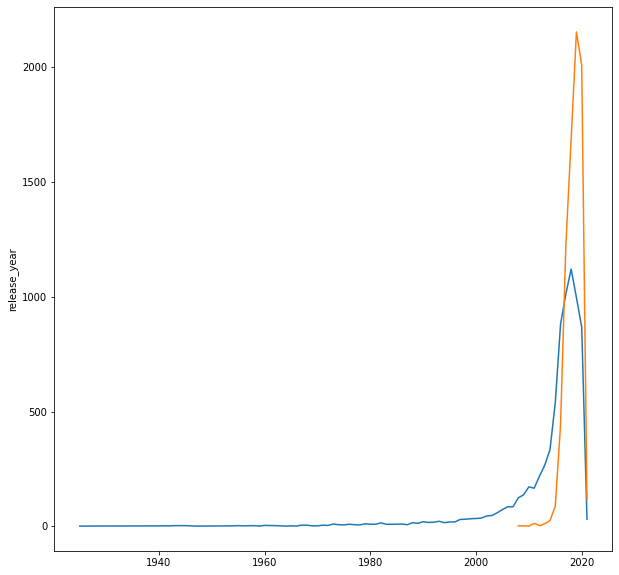

In [19]:
plt.figure(figsize=(10 , 10))
sns.lineplot(data=rel_year)
sns.lineplot(data=add_year)
plt.show()


In [18]:
len(rel_year)

73

In [20]:
rel_year

2018    1120
2017    1012
2019     996
2016     881
2020     868
2015     539
2014     334
2013     266
2012     218
2010     172
2011     166
2009     137
2008     124
2007      85
2006      85
2005      73
2004      59
2003      47
2002      45
2001      36
2000      34
1999      33
2021      31
1998      31
1997      30
1993      22
1990      20
1995      19
1996      19
1992      18
1991      17
1988      16
1994      16
1982      15
1989      13
1979      11
1973      10
1986      10
1983       9
1984       9
1985       9
1976       9
1981       9
1980       9
1977       7
1974       7
1987       7
1975       6
1978       6
1967       5
1968       5
1971       5
1960       4
1972       4
1945       3
1955       3
1962       3
1944       3
1943       3
1958       3
1946       2
1965       2
1942       2
1969       2
1963       2
1954       2
1970       2
1956       2
1925       1
1964       1
1966       1
1947       1
1959       1
Name: release_year, dtype: int64

In [64]:
release_diff = {}
diff_med  = {}

diff_mod = {}
for i in range(2000, 2021):
    rows = df[df['release_year'] ==i ]
    diff = rows['added_year'].mean() - i
    release_diff[i] = diff
    
    dif_med = rows['added_year'].median() - i
    diff_med[i] = dif_med
    
    dif_mod = rows['added_year'].mode() - i
    diff_mod[i] = dif_mod[0]
    

diff_series = pd.Series(release_diff)
diff_series

# diff_median = pd.Series(diff_med)
# diff_median
    

2000    18.617647
2001    17.500000
2002    17.022222
2003    16.000000
2004    14.745763
2005    13.643836
2006    12.670588
2007    11.529412
2008    10.532258
2009     9.459854
2010     8.319767
2011     7.469880
2012     6.169725
2013     4.977444
2014     3.859281
2015     2.404453
2016     1.531215
2017     0.987154
2018     0.617857
2019     0.287149
2020     0.010369
dtype: float64

In [47]:
diff_median = pd.Series(diff_med)
diff_median

2000    19.0
2001    18.0
2002    17.0
2003    16.0
2004    15.0
2005    14.0
2006    13.0
2007    12.0
2008    11.0
2009    10.0
2010     8.0
2011     8.0
2012     6.0
2013     5.0
2014     4.0
2015     2.0
2016     1.0
2017     1.0
2018     0.0
2019     0.0
2020     0.0
dtype: float64

In [65]:
diff_mode = pd.Series(diff_mod)
diff_mode

2000    20
2001    18
2002    17
2003    16
2004    16
2005    14
2006    13
2007    12
2008    11
2009     9
2010     9
2011     8
2012     6
2013     6
2014     3
2015     2
2016     1
2017     0
2018     0
2019     0
2020     0
dtype: int64

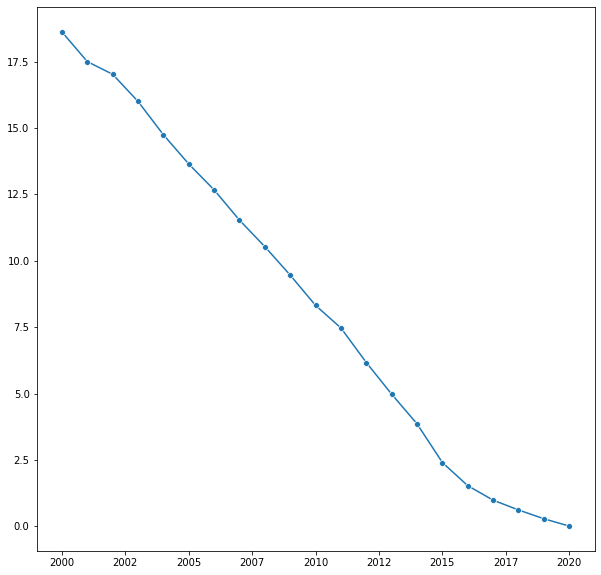

In [57]:
from  matplotlib.ticker import FuncFormatter
plt.figure(figsize=(10 , 10))
ax = sns.lineplot(data=diff_series, marker='o')
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
# ax = plt.plot(diff_series.index, diff_series.values, marker='o')
# ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
plt.show()

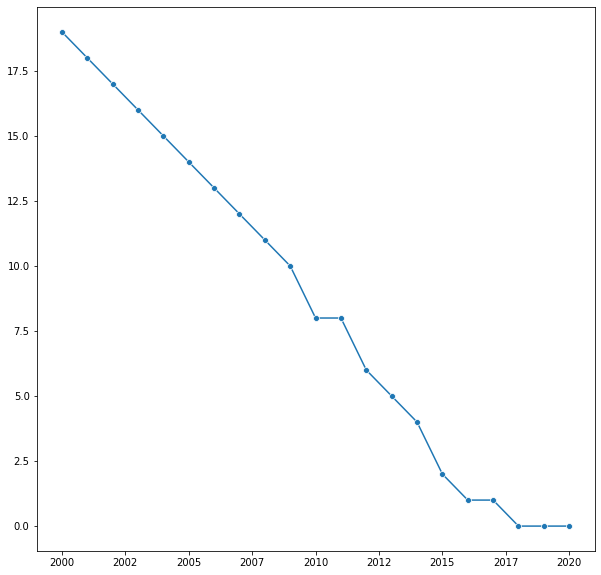

In [48]:
from  matplotlib.ticker import FuncFormatter
plt.figure(figsize=(10 , 10))
ax = sns.lineplot(data=diff_median, marker='o')
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
# ax = plt.plot(diff_series.index, diff_series.values, marker='o')
# ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
plt.show()

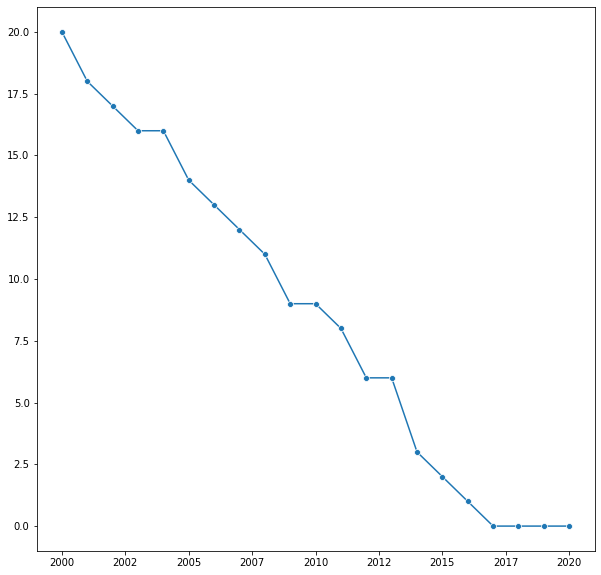

In [66]:
from  matplotlib.ticker import FuncFormatter
plt.figure(figsize=(10 , 10))
ax = sns.lineplot(data=diff_mode, marker='o')
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
# ax = plt.plot(diff_series.index, diff_series.values, marker='o')
# ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
plt.show()

In [28]:
release_diff = {}
for i in range(2000, 2021):
    rows = df[df['release_year'] ==i ]
    diff = (rows['added_year'] - rows['release_year']).mean()
    release_diff[i] = diff

diff_series = pd.Series(release_diff)
diff_series

2000    18.617647
2001    17.500000
2002    17.022222
2003    16.000000
2004    14.745763
2005    13.643836
2006    12.670588
2007    11.529412
2008    10.532258
2009     9.459854
2010     8.319767
2011     7.469880
2012     6.169725
2013     4.977444
2014     3.859281
2015     2.404453
2016     1.531215
2017     0.987154
2018     0.617857
2019     0.287149
2020     0.010369
dtype: float64

In [23]:
diff = df['added_year'] - df['release_year']

In [24]:
diff

0        0
1        0
2        7
3        8
4       12
        ..
7782    15
7783     4
7784     1
7785     1
7786     1
Length: 7777, dtype: int64

In [79]:
df['listed_in'].value_counts()

Documentaries                                                                      334
Stand-Up Comedy                                                                    321
Dramas, International Movies                                                       320
Comedies, Dramas, International Movies                                             243
Dramas, Independent Movies, International Movies                                   215
                                                                                  ... 
Anime Series, Crime TV Shows, TV Thrillers                                           1
Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows                         1
Crime TV Shows, International TV Shows, Reality TV                                   1
International Movies, Romantic Movies, Sci-Fi & Fantasy                              1
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows      1
Name: listed_in, Length: 491, dtype: int64

In [71]:
all_genres = df['listed_in'].unique()

In [72]:
len(all_genres)

491

In [73]:
genres_set = set()
for gen in all_genres:
    g = [word.strip() for word in gen.split(',')]
    genres_set.update(g)

genres = list(genres_set)
len(genres)
    

42

In [74]:
genres

['International TV Shows',
 'LGBTQ Movies',
 'TV Thrillers',
 'Horror Movies',
 'Anime Features',
 'TV Comedies',
 'Sports Movies',
 'Thrillers',
 'Classic & Cult TV',
 'Science & Nature TV',
 'Independent Movies',
 'Romantic TV Shows',
 'TV Dramas',
 'Sci-Fi & Fantasy',
 'Action & Adventure',
 'Docuseries',
 'International Movies',
 'TV Sci-Fi & Fantasy',
 'Documentaries',
 'Anime Series',
 'TV Action & Adventure',
 'Children & Family Movies',
 'TV Horror',
 'Dramas',
 'Romantic Movies',
 'Spanish-Language TV Shows',
 'Stand-Up Comedy & Talk Shows',
 "Kids' TV",
 'TV Shows',
 'Movies',
 'Cult Movies',
 'Teen TV Shows',
 'Stand-Up Comedy',
 'Faith & Spirituality',
 'Reality TV',
 'Crime TV Shows',
 'TV Mysteries',
 'Music & Musicals',
 'Classic Movies',
 'Korean TV Shows',
 'British TV Shows',
 'Comedies']

In [84]:
all_genre_list = []
for i in range(len(df)):
    g = [word.strip() for word in df.listed_in.iloc[i].split(',')]
    all_genre_list.extend(g)

genre_counts = {}
for i in all_genre_list:
    genre_counts[i] = all_genre_list.count(i)

print(genre_counts)

{'International TV Shows': 1198, 'TV Dramas': 703, 'TV Sci-Fi & Fantasy': 75, 'Dramas': 2106, 'International Movies': 2437, 'Horror Movies': 312, 'Action & Adventure': 721, 'Independent Movies': 673, 'Sci-Fi & Fantasy': 218, 'TV Mysteries': 90, 'Thrillers': 491, 'Crime TV Shows': 426, 'Docuseries': 352, 'Documentaries': 786, 'Sports Movies': 196, 'Comedies': 1471, 'Anime Series': 147, 'Reality TV': 222, 'TV Comedies': 518, 'Romantic Movies': 531, 'Romantic TV Shows': 333, 'Science & Nature TV': 85, 'Movies': 56, 'British TV Shows': 231, 'Korean TV Shows': 150, 'Music & Musicals': 321, 'LGBTQ Movies': 90, 'Faith & Spirituality': 57, "Kids' TV": 412, 'TV Action & Adventure': 149, 'Spanish-Language TV Shows': 146, 'Children & Family Movies': 532, 'TV Shows': 12, 'Classic Movies': 103, 'Cult Movies': 59, 'TV Horror': 69, 'Stand-Up Comedy & Talk Shows': 52, 'Teen TV Shows': 60, 'Stand-Up Comedy': 329, 'Anime Features': 57, 'TV Thrillers': 50, 'Classic & Cult TV': 25}


In [91]:
sorted_genres = dict(sorted(genre_counts.items(), key=lambda item: item[1], reverse=True))

In [98]:
print(sorted_genres)

{'International Movies': 2437, 'Dramas': 2106, 'Comedies': 1471, 'International TV Shows': 1198, 'Documentaries': 786, 'Action & Adventure': 721, 'TV Dramas': 703, 'Independent Movies': 673, 'Children & Family Movies': 532, 'Romantic Movies': 531, 'TV Comedies': 518, 'Thrillers': 491, 'Crime TV Shows': 426, "Kids' TV": 412, 'Docuseries': 352, 'Romantic TV Shows': 333, 'Stand-Up Comedy': 329, 'Music & Musicals': 321, 'Horror Movies': 312, 'British TV Shows': 231, 'Reality TV': 222, 'Sci-Fi & Fantasy': 218, 'Sports Movies': 196, 'Korean TV Shows': 150, 'TV Action & Adventure': 149, 'Anime Series': 147, 'Spanish-Language TV Shows': 146, 'Classic Movies': 103, 'TV Mysteries': 90, 'LGBTQ Movies': 90, 'Science & Nature TV': 85, 'TV Sci-Fi & Fantasy': 75, 'TV Horror': 69, 'Teen TV Shows': 60, 'Cult Movies': 59, 'Faith & Spirituality': 57, 'Anime Features': 57, 'Movies': 56, 'Stand-Up Comedy & Talk Shows': 52, 'TV Thrillers': 50, 'Classic & Cult TV': 25, 'TV Shows': 12}


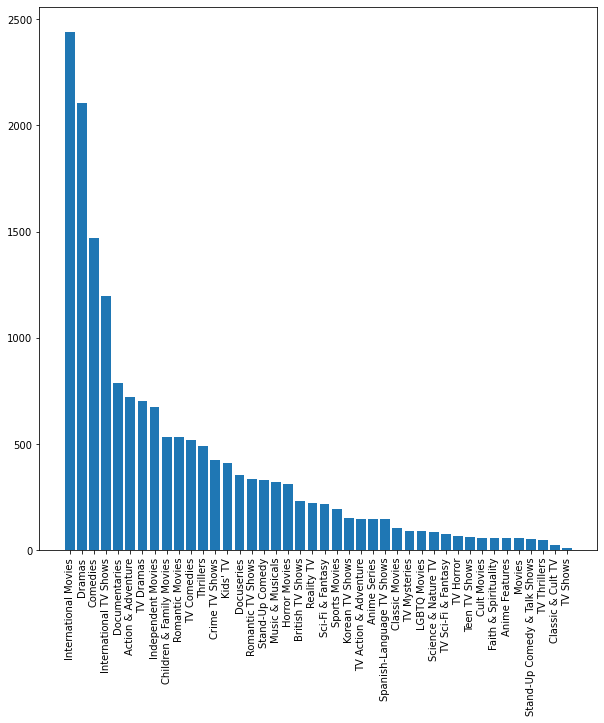

In [96]:
plt.figure(figsize=(10 , 10))
plt.bar(sorted_genres.keys(), sorted_genres.values())
plt.xticks(rotation='vertical')
plt.show()

In [101]:
import itertools
top_5 = dict(itertools.islice(iter(sorted_genres.items()) , 5))

{'International Movies': 2437,
 'Dramas': 2106,
 'Comedies': 1471,
 'International TV Shows': 1198,
 'Documentaries': 786}

In [110]:
# df.dropna(subset=['rating'], inplace=True)

In [111]:
df['rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [130]:
top5 = list(sorted_genres.keys())[:5]

In [131]:
top5


['International Movies',
 'Dramas',
 'Comedies',
 'International TV Shows',
 'Documentaries']

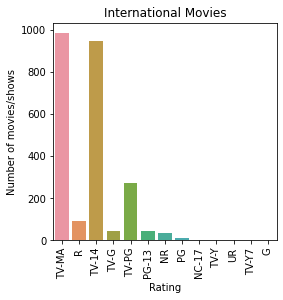

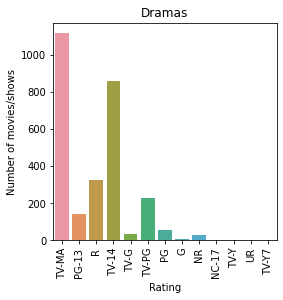

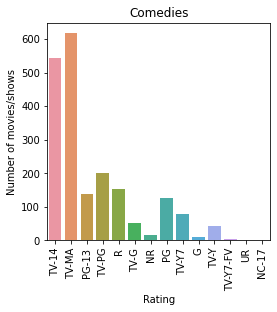

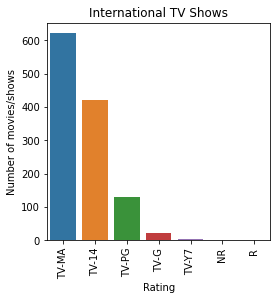

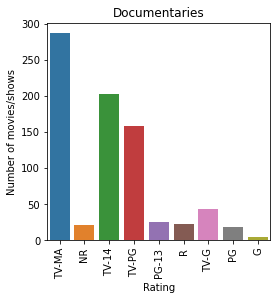

In [144]:
for top in top5:
    plt.figure(figsize=(4 , 4))
    rating_records = df[df['listed_in'].str.contains(top)]
    ax = sns.countplot(data=rating_records, x='rating')
    ax.set(xlabel='Rating', ylabel='Number of movies/shows', title=top)
    plt.xticks(rotation='vertical')
    plt.show()
    
#     rating_records.plot.pie(y='rating', figsize=(5, 5))

    

# rating_records.head()
    

In [119]:
df[df['listed_in'].str.contains('Dramas')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,added_month
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,Aug
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,Dec
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,Jan
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017,Jul
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,2019-11-01,1997,R,119 min,Dramas,After one of his high school students attacks ...,2019,Nov
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7774,s7775,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019,Nov
7776,s7777,Movie,Zokkomon,Satyajit Bhatkal,"Darsheel Safary, Anupam Kher, Manjari Fadnis, ...",India,2018-11-01,2011,PG,104 min,"Children & Family Movies, Dramas","When his cruel uncle abandons him, a young orp...",2018,Nov
7780,s7781,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,2018-07-01,2018,TV-MA,94 min,"Dramas, Independent Movies, International Movies",A drug dealer starts having doubts about his t...,2018,Jul
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020,Oct
